In [19]:
from cnmodel import populations
from cnmodel.util import sound, random_seed
from cnmodel.protocols import Protocol
from collections import OrderedDict
import os, sys, time
import pickle
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from neuron import h
import multiprocessing as mp
from scipy.signal import savgol_filter
import yaml

In [2]:
results = pickle.load(open('/home/kedoxey/DCN_model/output/response_maps-network/results_df.pkl', 'rb'))

In [10]:
avg_rates = pickle.load(open('/home/kedoxey/DCN_model/output/response_maps-network/rep_avg_rates.pkl', 'rb'))

In [14]:
for stim, iterations in list(avg_rates.items()):
    temp = 5

    stim_avg_rates = np.average(np.array(iterations), axis=0)


In [18]:
stimpar = {
    "dur": 0.2,
    "pip": 0.04,
    "start": [0.1],
    "baseline": [50, 100],
    "response": [100, 140],
}

input_freq = 10e3
input_level = 40

In [15]:
pyramidal_ids_per_band = pickle.load(open('/home/kedoxey/DCN_model/output/response_maps-network/pyramidal_ids_per_band.pkl', 'rb'))

In [16]:
freqs = list(pyramidal_ids_per_band.keys())
b = (freqs[-1] - freqs[0]) / np.log(freqs[-1] / freqs[0])
a = freqs[0] - b * np.log(freqs[0])
freqs_log = a + b * np.log(freqs)

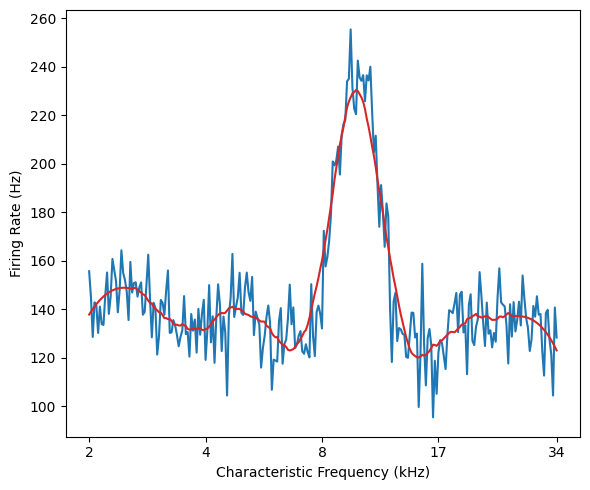

In [27]:
fig, axs = plt.subplots(1,1,figsize=(6,5))

axs.plot(freqs_log, stim_avg_rates, color='tab:blue')  #, 'o-')
axs.plot(freqs_log, savgol_filter(stim_avg_rates, 50, 3), color='tab:red')
axs.set_xticks([freqs_log[i] for i in [0, 65, 130, 195, 261]])
axs.set_xticklabels([round(freqs[i]/1000) for i in [0, 65, 130, 195, 261]])
axs.set_xlabel('Characteristic Frequency (kHz)')
axs.set_ylabel('Firing Rate (Hz)')
# fig.set_dpi(300)
fig.tight_layout()

## Scratch

In [19]:
spont_spikes = 0
spont_time = 0

for cell, vec in result.items():
    temp = 6
    if 'pyr' in cell[0]:
        spikes = vec[1]
        spont_spikes += ((spikes >= stimpar['baseline'][0]) * (spikes < stimpar['baseline'][1])).sum()
        spont_time += stimpar['baseline'][1] - stimpar['baseline'][0]

spont_rate = spont_spikes / spont_time
spont_rate

np.float64(0.1545826235093697)

In [27]:
num_pyr = 0
for (pop_type, cell_id), cell_data in result.items():
    temp = 5

    if 'pyr' in pop_type:
        num_pyr += 1
    else:
        break
num_pyr

1761

In [20]:


msfs = []
pyramidal_cell_ids = []

for (pop_type, cell_id), cell_data in result.items():
    temp = 5

    if 'pyr' in pop_type:
        pyramidal_cell_ids.append(cell_id)
        cell_ve = cell_data[0]
        spkt = cell_data[1]
        resp_spkt = spkt[((spkt >= stimpar['response'][0]) & (spkt <= stimpar['response'][1]))]

        num_spikes = len(resp_spkt)
        num_isi = num_spikes - 1 if num_spikes > 0 else 0
        msf = num_isi / (resp_spkt[-1] - resp_spkt[0]) * 1000 if num_spikes > 1 else 1
        msfs.append(msf)
    else:
        break

In [30]:
pyramidal_ids_per_band = pickle.load(open('/home/kedoxey/DCN_model/output/response_maps-network/pyramidal_ids_per_band.pkl', 'rb'))

In [34]:
avg_msfs = []

for cf, ids in pyramidal_ids_per_band.items():
    temp = 5

    msfs = []
    for pyr_id in ids:
        spkt = result[('pyramidal', pyr_id)][1]
        resp_spkt = spkt[((spkt >= stimpar['response'][0]) & (spkt <= stimpar['response'][1]))]

        num_spikes = len(resp_spkt)
        num_isi = num_spikes - 1 if num_spikes > 0 else 0
        msf = num_isi / (resp_spkt[-1] - resp_spkt[0]) * 1000 if num_spikes > 1 else 1
        msfs.append(msf)
        
    avg_msfs.append(np.mean(msfs))


In [36]:
len(avg_msfs)

262

In [21]:
pyramidal = populations.Pyramidal()

In [38]:
freqs = list(pyramidal_ids_per_band.keys())
len(freqs)
# for pyramidal_cell_id in pyramidal_cell_ids:
#     freqs.append(pyramidal._get_cf_array('rat')[pyramidal_cell_id])

262

In [39]:
b = (freqs[-1] - freqs[0]) / np.log(freqs[-1] / freqs[0])
a = freqs[0] - b * np.log(freqs[0])
freqs_log = a + b * np.log(freqs)

In [41]:
freqs

[np.float64(2000.0),
 np.float64(2021.8287104968945),
 np.float64(2043.8956672947666),
 np.float64(2066.2034706983836),
 np.float64(2088.7547493931597),
 np.float64(2111.552160754918),
 np.float64(2134.5983911630233),
 np.float64(2157.89615631694),
 np.float64(2181.4482015562417),
 np.float64(2205.257302184112),
 np.float64(2229.3262637943817),
 np.float64(2253.6579226021267),
 np.float64(2278.255145777883),
 np.float64(2303.120831785506),
 np.float64(2328.2579107237116),
 np.float64(2353.6693446713575),
 np.float64(2379.3581280364806),
 np.float64(2405.3272879091505),
 np.float64(2431.5798844181745),
 np.float64(2458.1190110916923),
 np.float64(2484.9477952217085),
 np.float64(2512.069398232604),
 np.float64(2539.4870160536666),
 np.float64(2567.203879495695),
 np.float64(2595.2232546317027),
 np.float64(2623.548443181784),
 np.float64(2652.1827829021804),
 np.float64(2681.129647978589),
 np.float64(2710.3924494237713),
 np.float64(2739.974635479491),
 np.float64(2769.8796920228488),


In [59]:
130/2

65.0

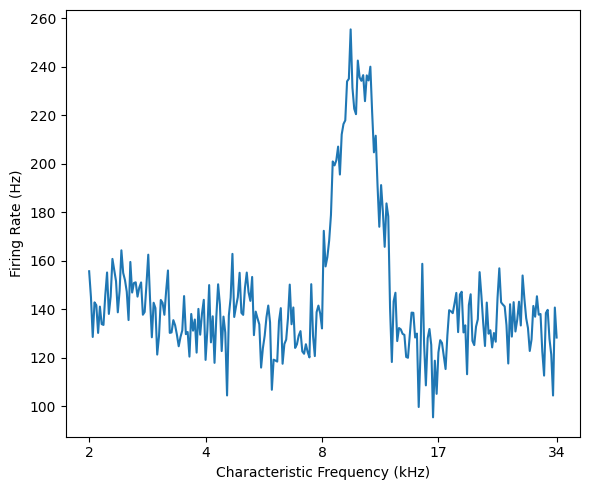

In [62]:
fig, axs = plt.subplots(1,1,figsize=(6,5))

axs.plot(freqs_log, avg_msfs)  #, 'o-')
axs.set_xticks([freqs_log[i] for i in [0, 65, 130, 195, 261]])
axs.set_xticklabels([round(freqs[i]/1000) for i in [0, 65, 130, 195, 261]])
axs.set_xlabel('Characteristic Frequency (kHz)')
axs.set_ylabel('Firing Rate (Hz)')
fig.tight_layout()

In [2]:
seed = 34657845
random_seed.set_seed(seed)

34657845

In [3]:
sgc = populations.SGC(model='dummy')
dstellate = populations.DStellate()
vertical = populations.Tuberculoventral()
pyramidal = populations.Pyramidal()

In [5]:
sgc.connect(pyramidal, dstellate, vertical)
dstellate.connect(pyramidal)
vertical.connect(pyramidal)

In [4]:
fmin = 2e3
fmax = 34e3
octavespacing = 1 / 64.0  # 8.0
n_frequencies = int(np.log2(fmax / fmin) / octavespacing) + 1
fvals = (
    np.logspace(
        np.log2(fmin / 1000.0),
        np.log2(fmax / 1000.0),
        num=n_frequencies,
        endpoint=True,
        base=2,
    )
    * 1000.0
)
len(fvals), fvals

(262,
 array([ 2000.        ,  2021.8287105 ,  2043.89566729,  2066.2034707 ,
         2088.75474939,  2111.55216075,  2134.59839116,  2157.89615632,
         2181.44820156,  2205.25730218,  2229.32626379,  2253.6579226 ,
         2278.25514578,  2303.12083179,  2328.25791072,  2353.66934467,
         2379.35812804,  2405.32728791,  2431.57988442,  2458.11901109,
         2484.94779522,  2512.06939823,  2539.48701605,  2567.2038795 ,
         2595.22325463,  2623.54844318,  2652.1827829 ,  2681.12964798,
         2710.39244942,  2739.97463548,  2769.87969202,  2800.11114298,
         2830.67255073,  2861.56751654,  2892.79968098,  2924.37272436,
         2956.29036715,  2988.55637044,  3021.17453635,  3054.1487085 ,
         3087.48277249,  3121.18065629,  3155.24633077,  3189.68381012,
         3224.49715235,  3259.69045977,  3295.26787945,  3331.23360372,
         3367.59187069,  3404.3469647 ,  3441.50321686,  3479.06500556,
         3517.03675696,  3555.42294555,  3594.22809463,  3

In [10]:
pyramidal_cell_ids = []
for fval in fvals:
    pyramidal_cell_ids.extend(pyramidal.select(1, cf=fval, create=True))
len(pyramidal_cell_ids)


25

In [11]:
pyramidal.resolve_inputs(depth=2)

getcellpars: modelType:  TVmouse
getcellpars: modelType:  TVmouse
getcellpars: modelType:  TVmouse
getcellpars: modelType:  TVmouse
getcellpars: modelType:  TVmouse
getcellpars: modelType:  TVmouse
getcellpars: modelType:  TVmouse
getcellpars: modelType:  TVmouse
getcellpars: modelType:  TVmouse
getcellpars: modelType:  TVmouse
getcellpars: modelType:  TVmouse
getcellpars: modelType:  TVmouse
getcellpars: modelType:  TVmouse
getcellpars: modelType:  TVmouse
getcellpars: modelType:  TVmouse
getcellpars: modelType:  TVmouse
getcellpars: modelType:  TVmouse
getcellpars: modelType:  TVmouse
getcellpars: modelType:  TVmouse
getcellpars: modelType:  TVmouse
getcellpars: modelType:  TVmouse
getcellpars: modelType:  TVmouse
getcellpars: modelType:  TVmouse
getcellpars: modelType:  TVmouse
getcellpars: modelType:  TVmouse
getcellpars: modelType:  TVmouse
getcellpars: modelType:  TVmouse
getcellpars: modelType:  TVmouse
getcellpars: modelType:  TVmouse
getcellpars: modelType:  TVmouse
getcellpar

In [13]:
for pop in [sgc, dstellate, vertical, pyramidal]:
    print(f'{pop.type} - {len(pop.real_cells())} cells')

sgc - 3319 cells
dstellate - 221 cells
tuberculoventral - 470 cells
pyramidal - 25 cells


In [14]:
level = 40
stimpar = {
    'level': 40,
    'freq': 10e3,
    "dur": 0.2,
    "pip": 0.04,
    "start": [0.1],
    "baseline": [50, 100],
    "response": [100, 140],
}

In [ ]:
stim = sound.TonePip(
    rate=100e3,
    duration=stimpar["dur"],
    f0=stimpar['freq'],
    dbspl=stimpar['level'],  # dura 0.2, pip_start 0.1 pipdur 0.04
    ramp_duration=2.5e-3,
    pip_duration=stimpar["pip"],
    pip_start=stimpar["start"]
)